# Calculate and plot the correlations of a list of assets


## Imports

In [1]:
%load_ext dotenv
%dotenv ../.env

import pandas as pd
import plotly.express as px
import numpy as np

from investmentstk.models.asset import Asset
from investmentstk.models.bar import barset_to_dataframe
from investmentstk.models.source import Source
from investmentstk.plots.correlation import plot_correlation_matrix, discrete_colorscale
from investmentstk.plots.correlation import format_tick_values, format_tick_text, cluster_by_correlation


## Input

In [2]:
# Set this to True when running locally to get interactive charts
# When publishing the notebook on GitHub, we need static images
IS_INTERACTIVE = False

assets = [
    Asset("NIBE_B", Source.Avanza, "5325"),
    Asset("QTCOM", Source.Avanza, "654081"),
    Asset("INDT", Source.Avanza, "26607"),
    Asset("ANOD_B", Source.Avanza, "5442"),
    Asset("SECARE", Source.Avanza, "666686"),
    Asset("CHEMM", Source.Avanza, "62369"),
    Asset("ADDT_B", Source.Avanza, "5537"),
    Asset("SAGA_B", Source.Avanza, "405815"),
    Asset("DSV", Source.Avanza, "52415"),
    Asset("SINCH", Source.Avanza, "599956"),
    Asset("ASML", Source.Avanza, "732279"),
    Asset("SDIP_B", Source.Avanza, "752256"),
    Asset("ACN", Source.Avanza, "4965"),
    Asset("RMS", Source.Avanza, "745819"),
    Asset("TEP", Source.Avanza, "745787"),
    Asset("INTU", Source.Avanza, "3401"),
    Asset("TGT", Source.Avanza, "4134"),
    Asset("SOF", Source.Avanza, "732311"),
    Asset("EPAM", Source.Avanza, "335653"),
    Asset("PRCO_B", Source.Avanza, "158470"),
    Asset("CROX", Source.Avanza, "36527"),
    Asset("MSCI", Source.Avanza, "376137"),
    Asset("US NDAQ", Source.CMC, "X-ABFMB"),
    Asset("Heating Oil", Source.CMC, "X-AATJL"),
    Asset("Germany 30", Source.CMC, "X-AASOB"),
    Asset("Big Tech", Source.CMC, "X-ALMEO"),
    Asset("Energy Index", Source.CMC, "X-AAQTP"),
    Asset("Sugar Raw", Source.CMC, "X-ABDOR"),
    Asset("Natural Gas", Source.CMC, "X-AAYIN"),
]

## Helpers

In [3]:
def merge_dataframes(assets_dfs):
    # TODO: If one asset only has data from 3 months ago, it caps all other assets
    df = pd.concat(assets_dfs, axis="columns", join="outer")
    df = df.sort_index()

    return df


def convert_to_pct_change(assets_dfs):
    df = assets_dfs.copy()

    for column in df:
        df[column] = df[column].pct_change()

    return df


## Format input

In [4]:
assets_dfs = []

for asset in assets:
    bars = asset.retrieve_prices()
    df = barset_to_dataframe(bars, asset)
    assets_dfs.append(df)

df = merge_dataframes(assets_dfs)
df = convert_to_pct_change(df)

## Plot correlation matrix

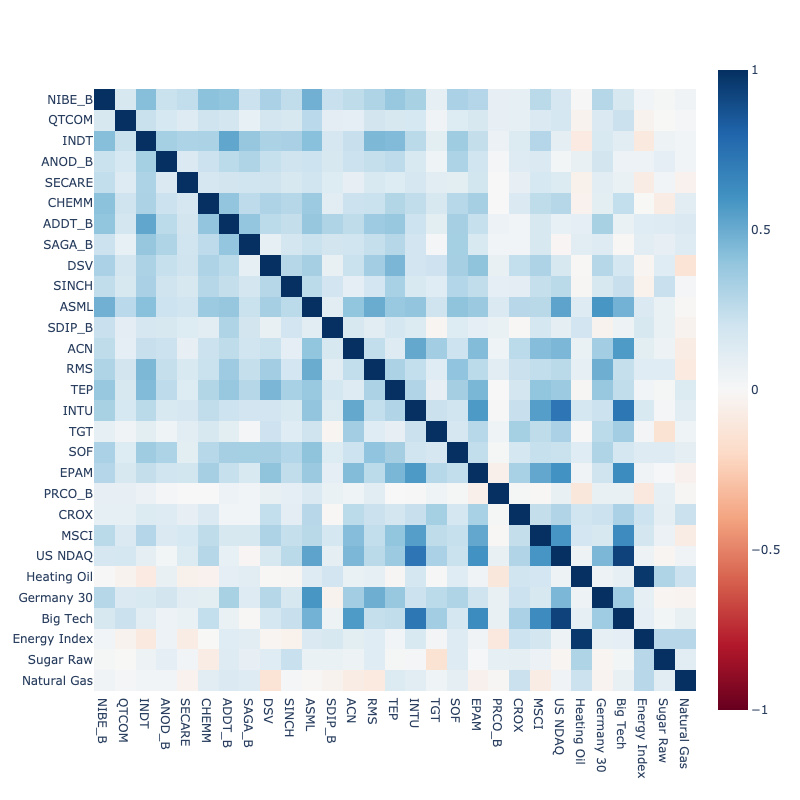

In [5]:
correlations = df.corr()
plot_correlation_matrix(correlations, interactive=IS_INTERACTIVE, width=800, height=800)

## Plot clustered correlation matrix

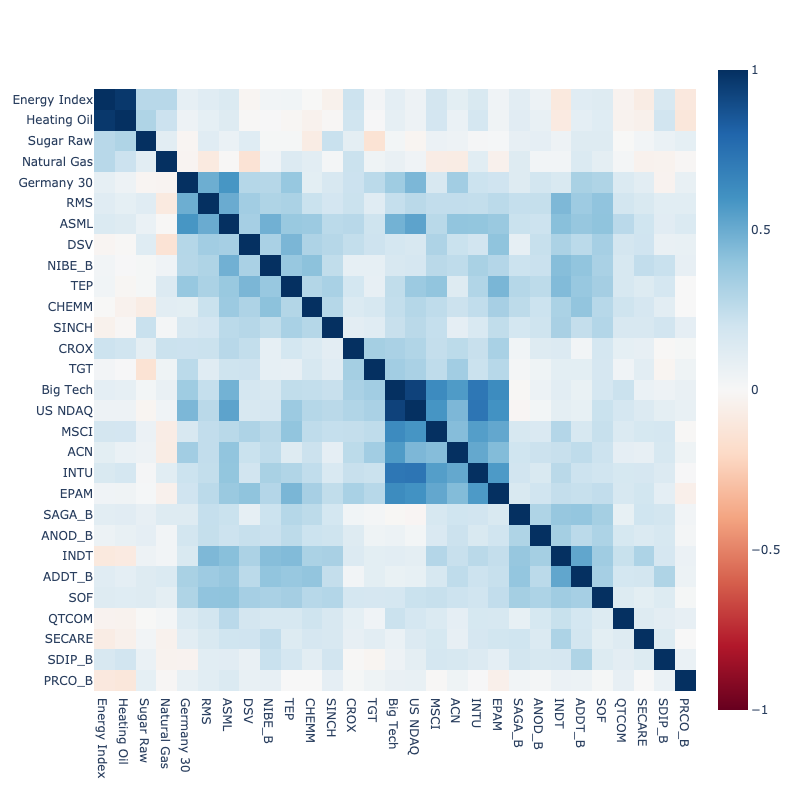

In [6]:
clustered_df = cluster_by_correlation(df)
clustered_df_corr = clustered_df.corr()
plot_correlation_matrix(clustered_df_corr, interactive=IS_INTERACTIVE, width=800, height=800)

## Plot clustered correlation matrix, binned

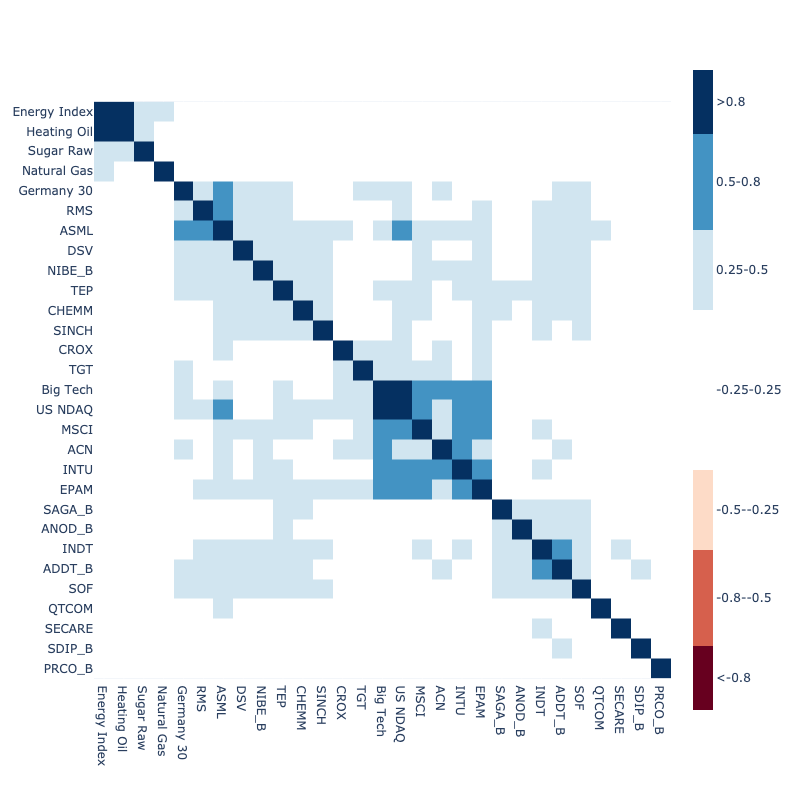

In [7]:
boundaries = [-1, -0.8, -0.5, -0.25, 0.25, 0.5, 0.8, 1]
red_blue = px.colors.diverging.RdBu
colors = [red_blue[0], red_blue[2], red_blue[4], 'white', red_blue[-5], red_blue[-3], red_blue[-1]]
colorscale = discrete_colorscale(boundaries, colors)

boundaries = np.array(boundaries)
tick_values = format_tick_values(boundaries)
tick_text = format_tick_text(boundaries)

fig = px.imshow(clustered_df_corr, zmin=-1, zmax=1, width=800, height=800)
fig.layout.coloraxis1.colorscale = colorscale
fig.layout.coloraxis1.colorbar = dict(thickness=20,
                                      tickvals=tick_values,
                                      ticktext=tick_text)
if IS_INTERACTIVE:
    fig.show()
else:
    fig.show("png")